# EDA Analysis for customer segmentation using K-Means clustering machine learning algorithm

This notebook covers exploratory data analysis, univariate and bivariate clustering, as well as multivariate analysis, providing a comprehensive understanding of the dataset and its patterns. The explanations aim to guide both beginners and experienced individuals through each step of the process, making the notebook educational and informative.

Here, we start by importing essential libraries. Pandas is used for data manipulation, Seaborn and Matplotlib for data visualization, scikit-learn's KMeans for clustering, and StandardScaler for feature scaling. We load the dataset from the provided CSV file (Mall_Customers.csv) into a Pandas DataFrame and display the first few rows to get an initial understanding of the data.

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv("/content/Mall_Customers.csv")

In [ ]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# **Univariate Analysis**

We start the analysis by exploring descriptive statistics of the dataset, providing an overview of central tendencies and dispersion. We then visualize the univariate distribution of 'Annual Income (k$)' using a histogram (sns.distplot). Additionally, we create separate distplots for Age, Annual Income, and Spending Score to understand their individual distributions.

In [ ]:
#Univariate analysis
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


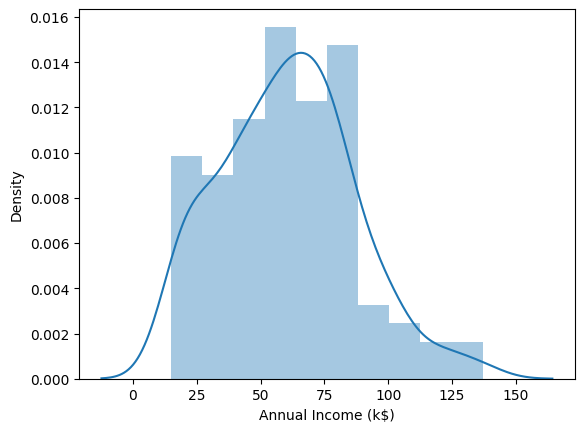

In [ ]:
sns.distplot(df['Annual Income (k$)']);

In [ ]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

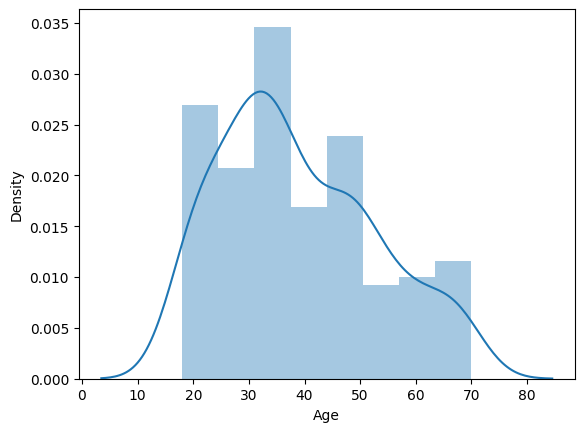

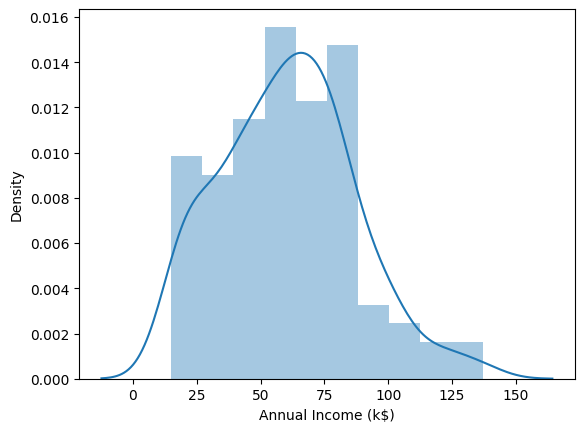

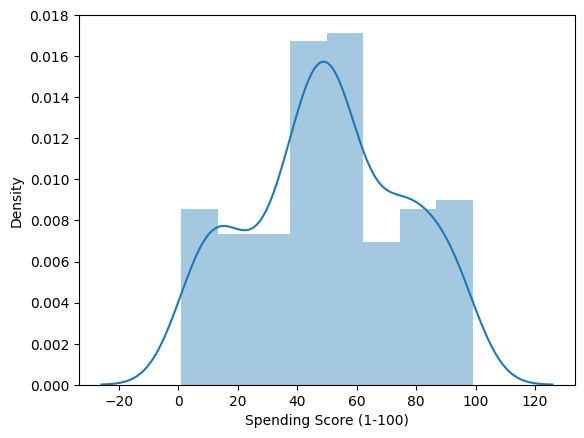

In [ ]:
columns = ['Age', 'Annual Income (k$)','Spending Score (1-100)']
for i in columns:
  plt.figure()
  sns.distplot(df[i]);

To prepare the data for kernel density plots, we use the pd.melt() function to transform the dataset into a long format. This format is suitable for visualizing the distribution of 'Annual Income (k$)' by Gender using a kernel density plot (sns.kdeplot). Kernel density plots provide insights into the distribution of continuous variables.

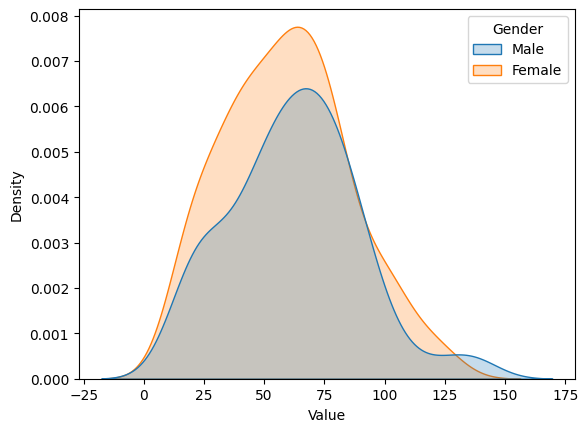

In [ ]:
df_long = pd.melt(df, id_vars=['Gender'], value_vars=['Annual Income (k$)'], var_name='Variable', value_name='Value')

# Use the melted DataFrame for kdeplot
sns.kdeplot(data=df_long, x='Value', shade=True, hue='Gender');

In [ ]:
df_long.head()

,Gender,Variable,Value
0,Male,Annual Income (k$),15
1,Male,Annual Income (k$),15
2,Female,Annual Income (k$),16
3,Female,Annual Income (k$),16
4,Female,Annual Income (k$),17


Building upon the previous step, we create kernel density plots for Age, Annual Income, and Spending Score, considering the Gender variable. These plots provide a visual representation of the distribution of each variable, differentiated by gender.

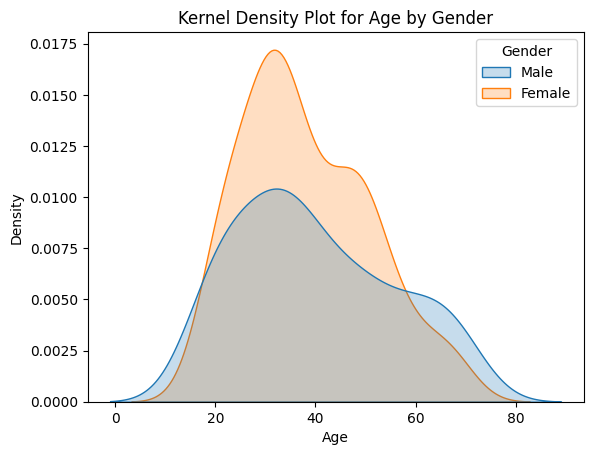

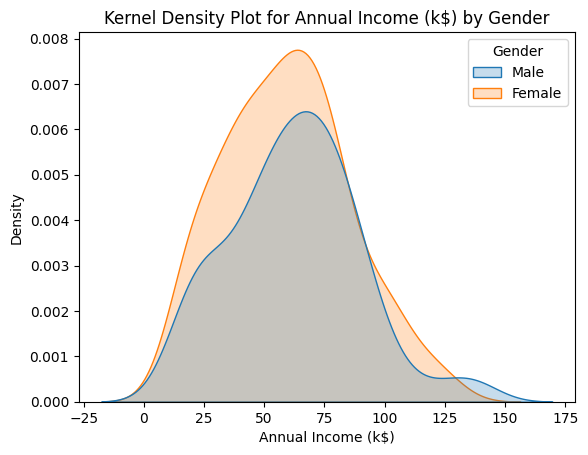

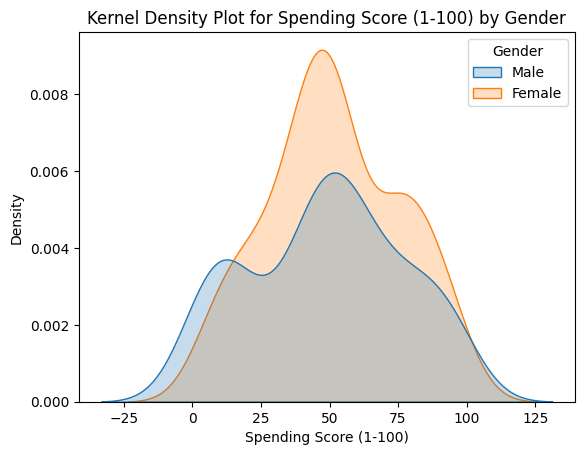

In [ ]:
columns = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']

for i in columns:
    plt.figure()
    sns.kdeplot(data=df, x=i, shade=True, hue='Gender');
    plt.title(f'Kernel Density Plot for {i} by Gender')
    plt.show()

Box plots are generated to visually compare the central tendency, spread, and identify potential outliers for Age, Annual Income, and Spending Score, grouped by Gender.

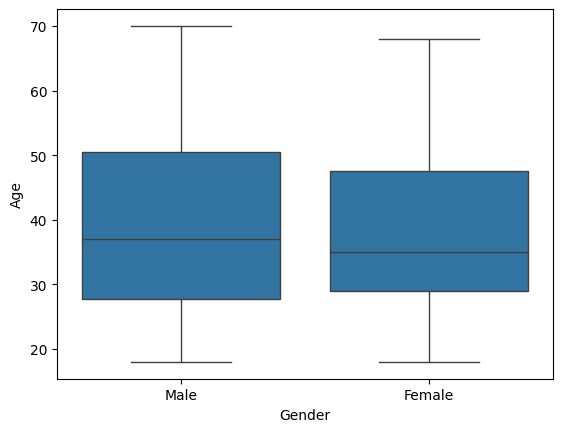

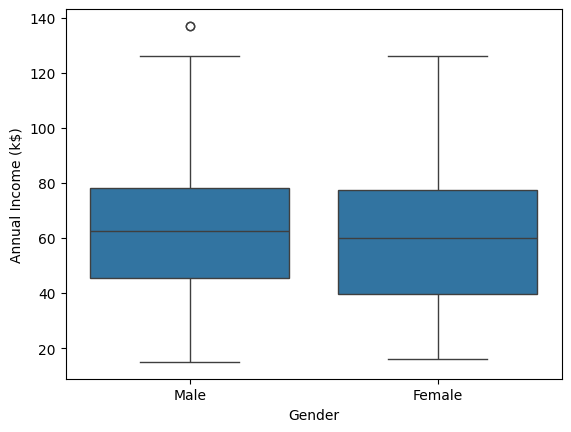

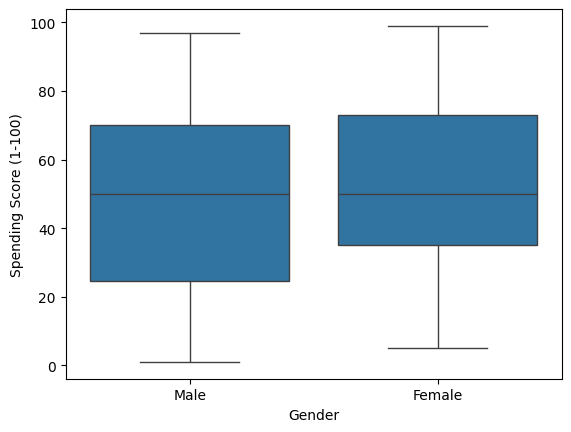

In [ ]:
columns = ['Age', 'Annual Income (k$)','Spending Score (1-100)']
for i in columns:
  plt.figure()
  sns.boxplot(data = df, x = 'Gender', y = df[i], )

Calculating and displaying the proportion of each gender in the dataset provides insights into the distribution of genders. This information is helpful for understanding the composition of the dataset.

In [ ]:
df['Gender'].value_counts(normalize = True)

Female    0.56
Male      0.44
Name: Gender, dtype: float64

# **Bivariate Analysis**

Moving into bivariate analysis, we start with a scatter plot of Annual Income vs Spending Score to explore their relationship. Subsequently, we create a pair plot for the entire dataset, color-coded by Gender, providing an overview of pairwise relationships. Grouping data by Gender and calculating mean values for Age, Annual Income, and Spending Score helps to understand average values for each gender. The correlation matrix and heatmap visualize the linear relationships between variables.

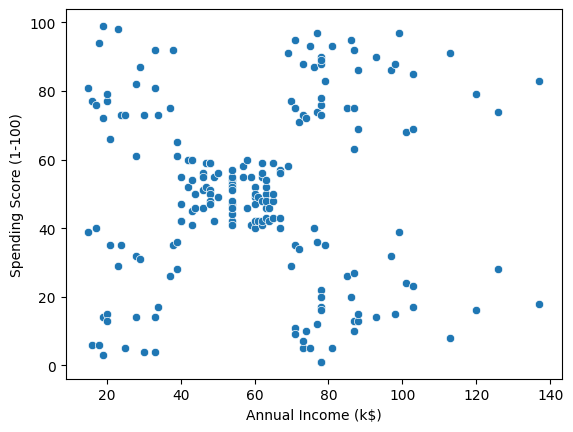

In [ ]:
#Bivariate Analysis
sns.scatterplot(data = df, x ='Annual Income (k$)',y = 'Spending Score (1-100)' );

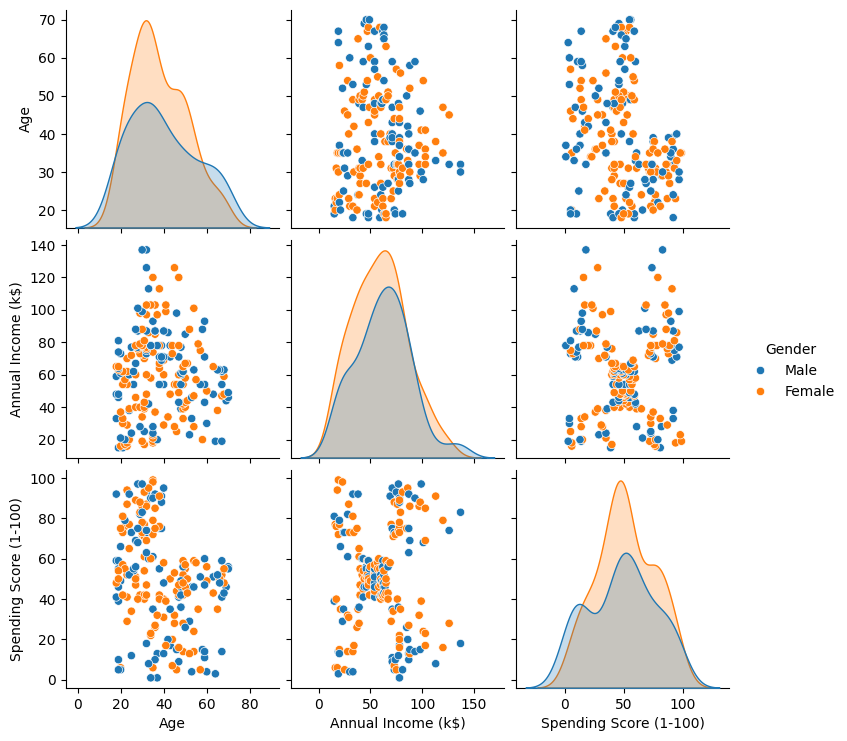

In [ ]:
# df = df.drop('CustomerID', axis = 1)
sns.pairplot(df, hue = 'Gender')

In [ ]:
df.groupby(['Gender'])['Age', 'Annual Income (k$)','Spending Score (1-100)'].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Gender,,,
Female,38.098214,59.250000,51.526786
Male,39.806818,62.227273,48.511364


In [ ]:
df.corr()

,Age,Annual Income (k$),Spending Score (1-100)
Age,1.000000,-0.012398,-0.327227
Annual Income (k$),-0.012398,1.000000,0.009903
Spending Score (1-100),-0.327227,0.009903,1.000000


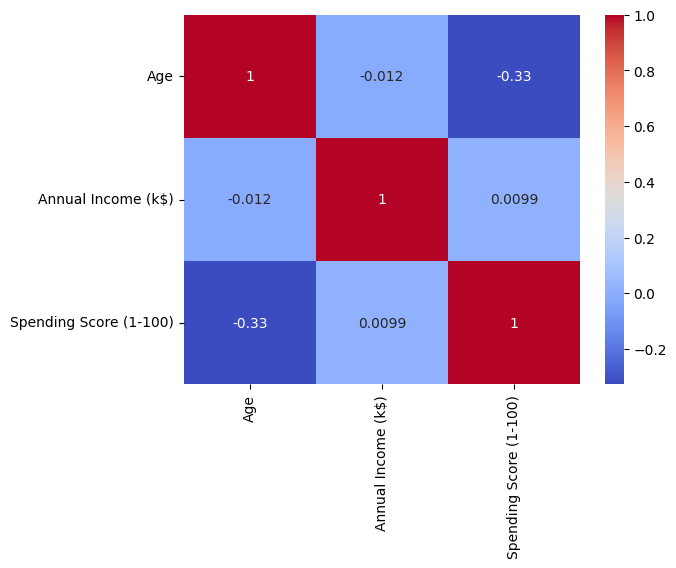

In [ ]:
sns.heatmap(df.corr(), annot = True, cmap = 'coolwarm');

# **Clustering** **-Univariate,Bivariate, Multivariate**

 Introducing clustering, we perform univariate clustering specifically for Annual Income using KMeans. We choose three clusters and display the counts of data points in each cluster. The inertia score is calculated for different numbers of clusters to determine the optimal number based on the "elbow" method.

In [ ]:
#clustering -Univariate,Bivariate, Multivariate
clustering1 = KMeans(n_clusters = 3)

In [ ]:
clustering1.fit(df[['Annual Income (k$)']])

KMeans(n_clusters=3)

In [ ]:
clustering1.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int32)

In [ ]:
df['Income Cluster'] = clustering1.labels_

In [ ]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster
0,Male,19,15,39,0
1,Male,21,15,81,0
2,Female,20,16,6,0
3,Female,23,16,77,0
4,Female,31,17,40,0


In [ ]:
df['Income Cluster'].value_counts()

2    90
0    74
1    36
Name: Income Cluster, dtype: int64

In [ ]:
clustering1.inertia_

23517.33093093093

In [ ]:
inertia_scores = []
for i in range(1,11):
  kmeans = KMeans(n_clusters = i)
  kmeans.fit(df[['Annual Income (k$)']])
  inertia_scores.append(kmeans.inertia_)

In [ ]:
inertia_scores

[137277.28000000006,
 48660.888888888876,
 23517.33093093093,
 13278.112713472483,
 8481.49619047619,
 5050.9047619047615,
 3941.4163614163635,
 2867.64175824176,
 2258.886111111111,
 1758.81204906205]

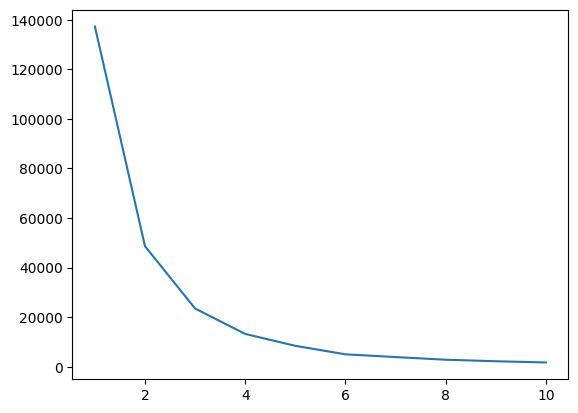

In [ ]:
plt.plot(range(1,11), inertia_scores)

In [ ]:
df.columns

Index(['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)',
       'Income Cluster'],
      dtype='object')

In [ ]:
df.groupby('Income Cluster')['Age', 'Annual Income (k$)', 'Spending Score (1-100)'].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Income Cluster,,,
0,39.500000,33.486486,50.229730
1,37.833333,99.888889,50.638889
2,38.722222,67.088889,50.000000


# **Bivariate Clustering**

Extending the clustering to bivariate analysis, we use KMeans to cluster data based on Annual Income and Spending Score into five groups. The counts of data points in each cluster are displayed, and the inertia score is computed for different numbers of clusters.

In [ ]:
clustering2 = KMeans(n_clusters = 5)
clustering2.fit(df[['Annual Income (k$)', 'Spending Score (1-100)']])
df['Spending and income cluster'] = clustering2.labels_
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and income cluster
0,Male,19,15,39,0,2
1,Male,21,15,81,0,4
2,Female,20,16,6,0,2
3,Female,23,16,77,0,4
4,Female,31,17,40,0,2


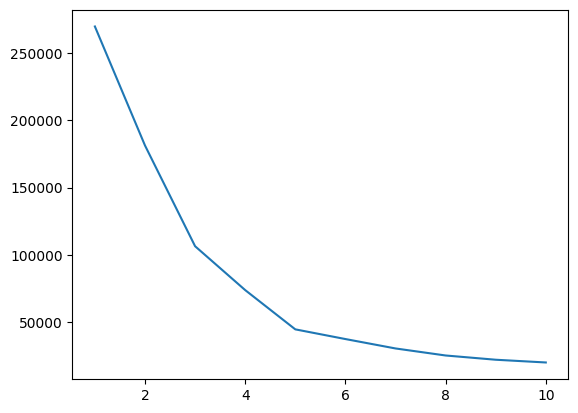

In [ ]:
inertia_scores2 = []
for i in range(1,11):
  kmeans2 = KMeans(n_clusters = i)
  kmeans2.fit(df[['Annual Income (k$)', 'Spending Score (1-100)']])
  inertia_scores2.append(kmeans2.inertia_)
plt.plot(range(1,11), inertia_scores2)

In [ ]:
centers = pd.DataFrame(clustering2.cluster_centers_)
centers.columns = ['x','y']

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

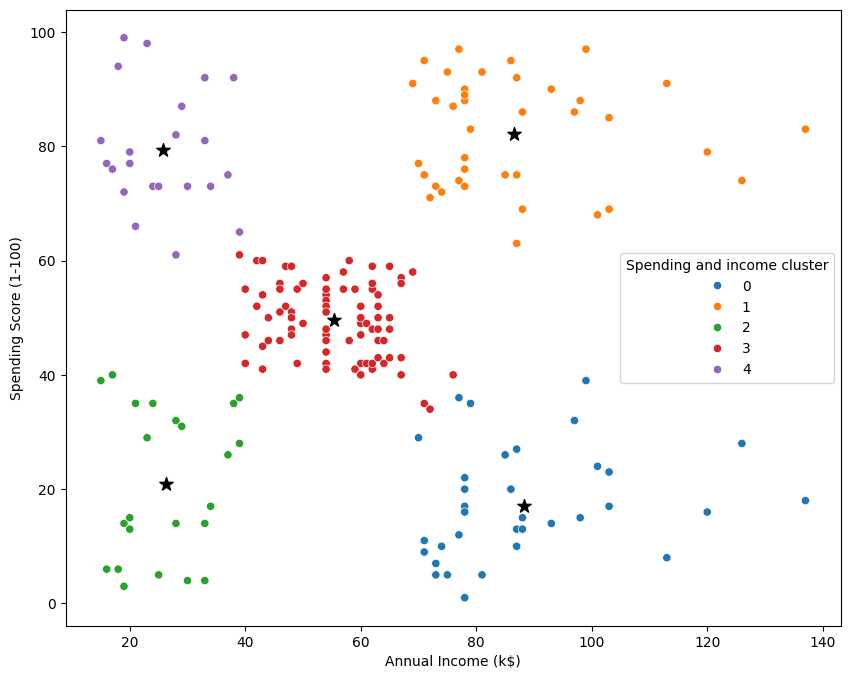

In [ ]:
plt.figure(figsize = (10,8))
plt.scatter(x = centers['x'], y = centers['y'], s = 100, c = 'black', marker='*')
sns.scatterplot(data = df, x = 'Annual Income (k$)', y = 'Spending Score (1-100)', hue = 'Spending and income cluster', palette = 'tab10')

In [ ]:
pd.crosstab(df['Spending and income cluster'],df['Gender'], normalize = 'index')

Gender,Female,Male
Spending and income cluster,,
0,0.457143,0.542857
1,0.538462,0.461538
2,0.608696,0.391304
3,0.592593,0.407407
4,0.590909,0.409091


In [ ]:
 df.groupby('Spending and income cluster')['Age', 'Annual Income (k$)', 'Spending Score (1-100)'].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Spending and income cluster,,,
0,41.114286,88.200000,17.114286
1,32.692308,86.538462,82.128205
2,45.217391,26.304348,20.913043
3,42.716049,55.296296,49.518519
4,25.272727,25.727273,79.363636


# **Multivariate Analysis**

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scale  = StandardScaler()

In [ ]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and income cluster
0,Male,19,15,39,0,2
1,Male,21,15,81,0,4
2,Female,20,16,6,0,2
3,Female,23,16,77,0,4
4,Female,31,17,40,0,2


In [ ]:
dff = pd.get_dummies(df, drop_first = True)
dff.head()

,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and income cluster,Gender_Male
0,19,15,39,0,2,1
1,21,15,81,0,4,1
2,20,16,6,0,2,0
3,23,16,77,0,4,0
4,31,17,40,0,2,0


In [ ]:
dff.columns

Index(['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Income Cluster',
       'Spending and income cluster', 'Gender_Male'],
      dtype='object')

In [ ]:
dff = dff[['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Gender_Male']]
dff.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
0,19,15,39,1
1,21,15,81,1
2,20,16,6,0
3,23,16,77,0
4,31,17,40,0


In [ ]:
dff = scale.fit_transform(dff)

In [ ]:
dff = pd.DataFrame(scale.fit_transform(dff))
dff

,0,1,2,3
0,-1.424569,-1.738999,-0.434801,1.128152
1,-1.281035,-1.738999,1.195704,1.128152
2,-1.352802,-1.700830,-1.715913,-0.886405
3,-1.137502,-1.700830,1.040418,-0.886405
4,-0.563369,-1.662660,-0.395980,-0.886405
...,...,...,...,...
195,-0.276302,2.268791,1.118061,-0.886405
196,0.441365,2.497807,-0.861839,-0.886405
197,-0.491602,2.497807,0.923953,1.128152
198,-0.491602,2.917671,-1.250054,1.128152


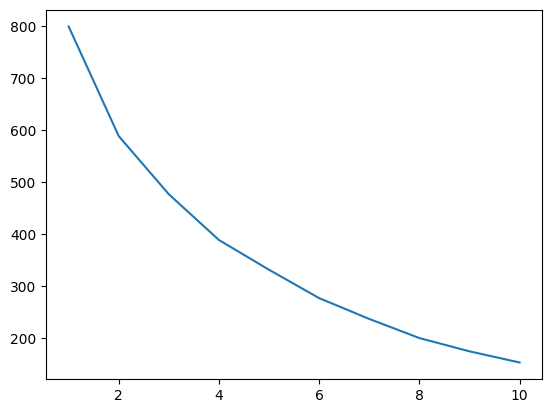

In [ ]:
inertia_scores3 = []
for i in range(1,11):
  kmeans3 = KMeans(n_clusters = i)
  kmeans3.fit(dff)
  inertia_scores3.append(kmeans3.inertia_)
plt.plot(range(1,11), inertia_scores3)

In [ ]:
df

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and income cluster
0,Male,19,15,39,0,2
1,Male,21,15,81,0,4
2,Female,20,16,6,0,2
3,Female,23,16,77,0,4
4,Female,31,17,40,0,2
...,...,...,...,...,...,...
195,Female,35,120,79,1,1
196,Female,45,126,28,1,0
197,Male,32,126,74,1,1
198,Male,32,137,18,1,0


In [ ]:
df.to_csv('Clustering.csv')